In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_excel("C:/Users/conne/Downloads/CLOUDTHAT_FOLDER/Telco_Customer_Churn.xlsx")
df.head()

,Customer ID,Gender,Age,Contract,Internet Type,Payment Method,Churn,Customer Status,Churn Reason,Churn Score,Satisfaction Score,Total Revenue,Streaming Platforms,Latitude,Longitude,City,Country
0,5312-UXESG,Female,43,Month-to-Month,Fiber Optic,Bank Withdrawal,No,Stayed,Other,0.58,4,5187.39,All,33.752938,-116.230055,Indio,United States
1,9581-GVBXT,Male,59,One Year,DSL,Credit Card,No,Stayed,Other,0.23,4,1980.30,No Streaming,34.818227,-120.418784,Santa Maria,United States
2,6211-WWLTF,Male,46,Two Year,Fiber Optic,Credit Card,No,Stayed,Other,0.39,3,8019.43,All,37.648647,-119.231447,Oakhurst,United States
3,0297-RBCSG,Male,61,One Year,DSL,Bank Withdrawal,No,Stayed,Other,0.39,4,2085.86,Movies + Music,37.791222,-122.402241,San Francisco,United States
4,8713-IGZSO,Male,50,Month-to-Month,Other,Credit Card,No,Joined,Other,0.57,3,142.50,No Streaming,36.722898,-121.633648,Salinas,United States


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          7043 non-null   object 
 1   Gender               7043 non-null   object 
 2   Age                  7043 non-null   int64  
 3   Contract             7043 non-null   object 
 4   Internet Type        7043 non-null   object 
 5   Payment Method       7043 non-null   object 
 6   Churn                7043 non-null   object 
 7   Customer Status      7043 non-null   object 
 8   Churn Reason         7043 non-null   object 
 9   Churn Score          7043 non-null   float64
 10  Satisfaction Score   7043 non-null   int64  
 11  Total Revenue        7043 non-null   float64
 12  Streaming Platforms  7043 non-null   object 
 13  Latitude             7043 non-null   float64
 14  Longitude            7043 non-null   float64
 15  City                 7043 non-null   o

In [11]:
print(df.describe())

               Age  Churn Score  Satisfaction Score  Total Revenue  \
count  7043.000000   7043.00000         7043.000000    7043.000000   
mean     46.509726      0.58505            3.244924    3034.379056   
std      16.750352      0.21170            1.201657    2865.204542   
min      19.000000      0.05000            1.000000      21.360000   
25%      32.000000      0.40000            3.000000     605.610000   
50%      46.000000      0.61000            3.000000    2108.640000   
75%      60.000000      0.75500            4.000000    4801.145000   
max      80.000000      0.96000            5.000000   11979.340000   

          Latitude    Longitude  
count  7043.000000  7043.000000  
mean     36.197455  -119.756684  
std       2.468929     2.154425  
min      32.555828  -124.301372  
25%      33.990646  -121.788090  
50%      36.205465  -119.595293  
75%      38.161321  -117.969795  
max      41.962127  -114.192901  


In [13]:
print(df.isnull().sum())

Customer ID            0
Gender                 0
Age                    0
Contract               0
Internet Type          0
Payment Method         0
Churn                  0
Customer Status        0
Churn Reason           0
Churn Score            0
Satisfaction Score     0
Total Revenue          0
Streaming Platforms    0
Latitude               0
Longitude              0
City                   0
Country                0
dtype: int64


In [15]:
# Frequency Tables
print("\nContract Type Distribution:")
print(df['Contract'].value_counts())


Contract Type Distribution:
Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64


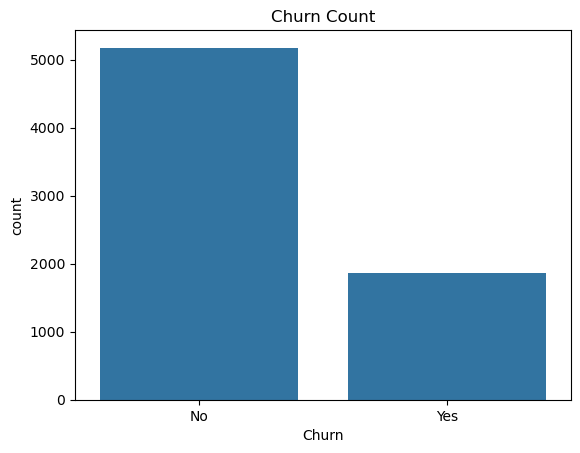

In [17]:
# Churn count
sns.countplot(data=df, x='Churn')
plt.title("Churn Count")
plt.show()

In [23]:
# 5. Quick churn insights by a few key features
if 'Contract' in df.columns:
    print("\nChurn rate by Contract type:\n", 
          (df.groupby('Contract')['Churn']
             .value_counts(normalize=True)
             .unstack()['Yes'] * 100).round(2))



Churn rate by Contract type:
 Contract
Month-to-Month    45.84
One Year          10.71
Two Year           2.55
Name: Yes, dtype: float64


In [37]:
# 5. Churn Rate by Internet Service
print("\nChurn Rate by Internet Service:")
print(df.groupby('Internet Type')['Churn'].value_counts(normalize=True).unstack() * 100)


Churn Rate by Internet Service:
Churn                 No        Yes
Internet Type                      
Cable          74.337349  25.662651
DSL            81.416465  18.583535
Fiber Optic    59.275124  40.724876
Other          92.595020   7.404980


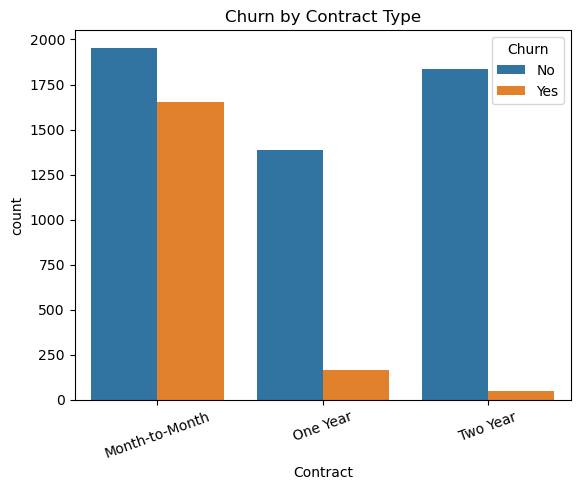

In [39]:
# 7. Visualization - Churn by Contract Type
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.xticks(rotation=20)
plt.show()

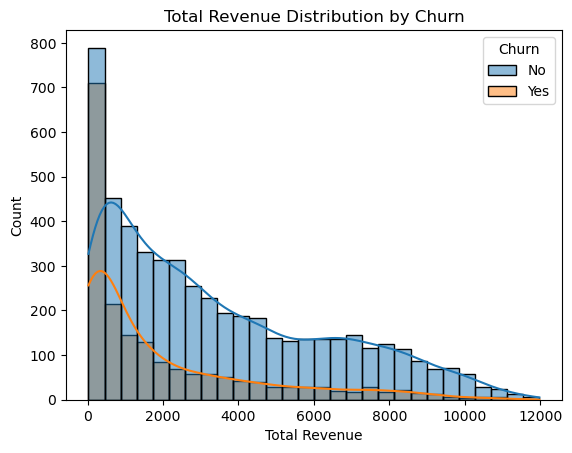

In [47]:
# Visualization - Total Revenue Distribution by Churn
sns.histplot(data=df, x='Total Revenue', hue='Churn', kde=True)
plt.title("Total Revenue Distribution by Churn")
plt.show()

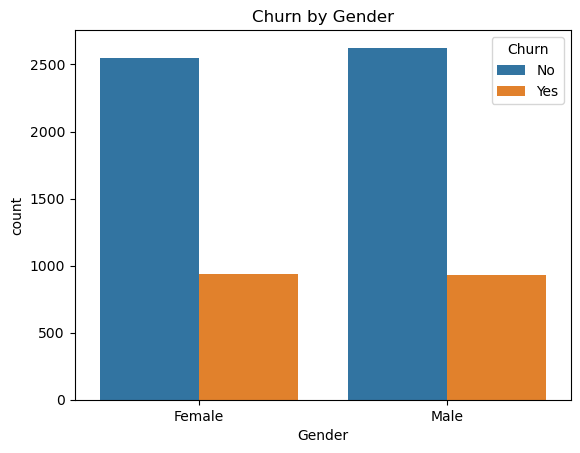

In [49]:
# 8. Visualization - Churn by Gender
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title("Churn by Gender")
plt.show()

Top 5 Cities by Customer Count:
City
Los Angeles      293
San Diego        285
San Jose         112
Sacramento       108
San Francisco    104
Name: count, dtype: int64


C:\Users\conne\AppData\Local\Temp\ipykernel_23836\2997793598.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")


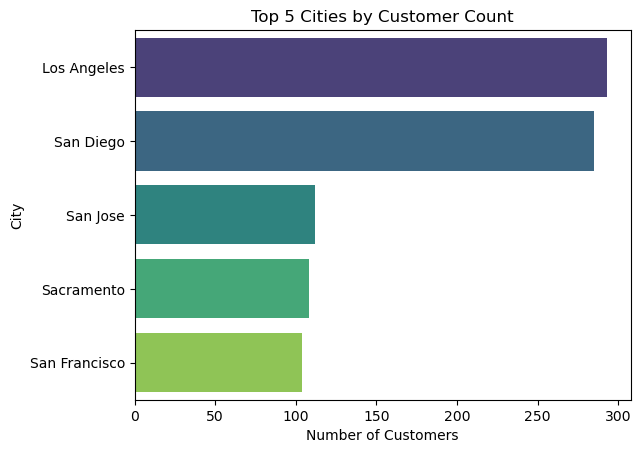

In [55]:
# Top 5 cities by customer count
top_cities = df['City'].value_counts().head(5)
print("Top 5 Cities by Customer Count:")
print(top_cities)

# Optional: Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")
plt.title("Top 5 Cities by Customer Count")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()

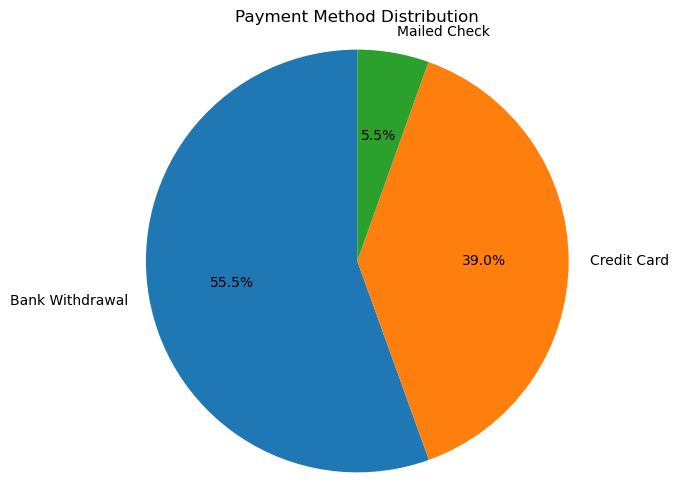

In [59]:
import matplotlib.pyplot as plt

# Count payment method occurrences
payment_counts = df['Payment Method'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Payment Method Distribution")
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()

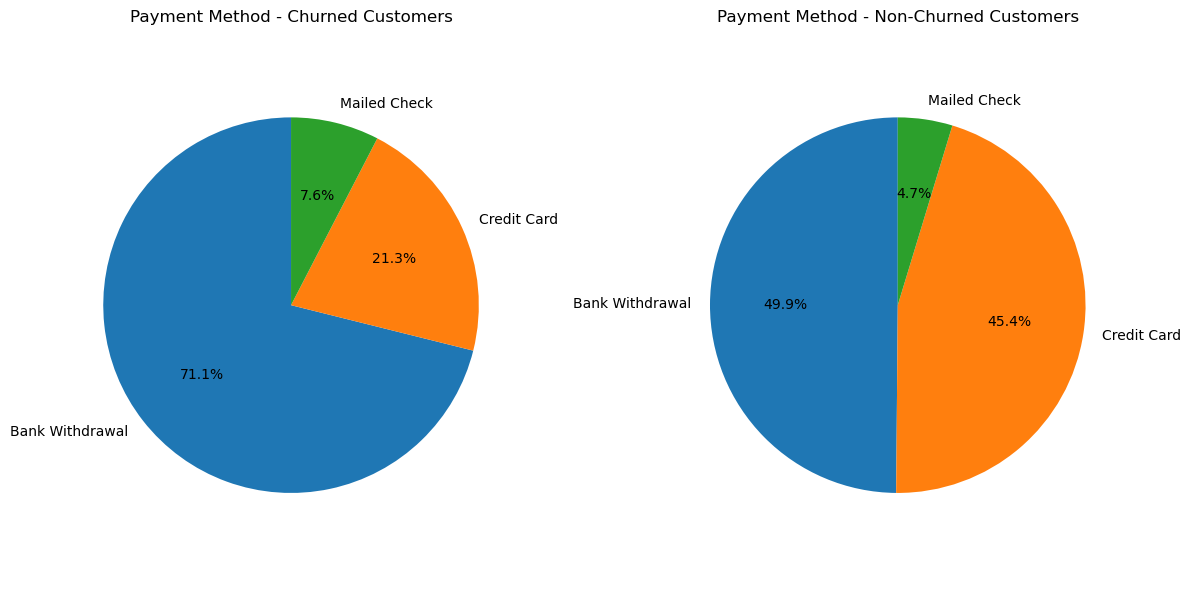

In [63]:
import matplotlib.pyplot as plt

# Separate churned and non-churned data
churned = df[df['Churn'] == 'Yes']['Payment Method'].value_counts()
non_churned = df[df['Churn'] == 'No']['Payment Method'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for churned customers
axes[0].pie(churned, labels=churned.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Payment Method - Churned Customers")
axes[0].axis('equal')

# Pie chart for non-churned customers
axes[1].pie(non_churned, labels=non_churned.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Payment Method - Non-Churned Customers")
axes[1].axis('equal')

plt.tight_layout()
plt.show()

In [67]:
# Count platform distribution
streaming_counts = df['Streaming Platforms'].value_counts()
print("Streaming Platforms Distribution:")
print(streaming_counts)

Streaming Platforms Distribution:
Streaming Platforms
No Streaming        3445
All                 1670
Streaming TV         735
Movies + Music       687
Movies + TV          270
Streaming Movies     105
Streaming Music       99
Music + TV            32
Name: count, dtype: int64


In [69]:
# Compare with churn
streaming_churn = df.groupby('Streaming Platforms')['Churn'].value_counts(normalize=True).unstack() * 100

print("\nChurn Rate by Streaming Platforms:")
print(streaming_churn)


Churn Rate by Streaming Platforms:
Churn                       No        Yes
Streaming Platforms                      
All                  73.053892  26.946108
Movies + Music       72.197962  27.802038
Movies + TV          55.185185  44.814815
Music + TV           28.125000  71.875000
No Streaming         78.403483  21.596517
Streaming Movies     46.666667  53.333333
Streaming Music      35.353535  64.646465
Streaming TV         70.068027  29.931973


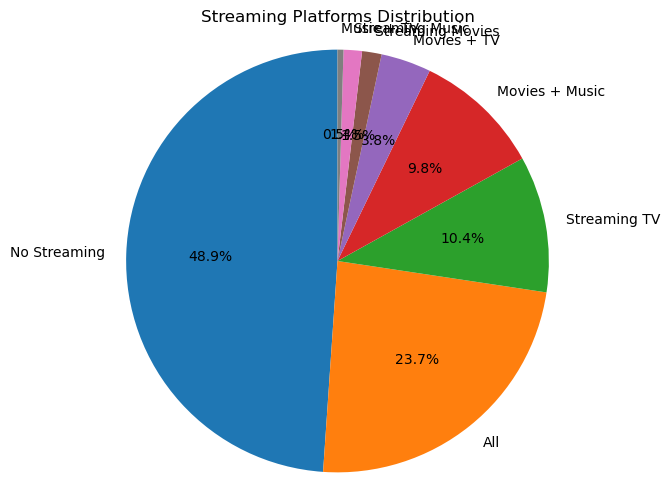

In [73]:
# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(streaming_counts, labels=streaming_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Streaming Platforms Distribution")
plt.axis('equal')
plt.show()